## Decision Trees Simple model.

In [1]:
### Importing the needed libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import wget

In [2]:
### Downloading the data set.


# url= "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv"

# File_download=wget.download(url)

100% [................................................................................] 6027 / 6027

In [3]:
### Importing and inspecting the data.
data_set=pd.read_csv("drug200.csv")

data_set.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [4]:
## Inspecting the data in details ##another way to visualize different values is data_set.name_column.unique()
print(data_set.Drug.value_counts())
print(" ")
print(data_set.Cholesterol.value_counts())
print(" ")
print(data_set.BP.value_counts())

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64
 
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
 
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


In [5]:
### Stats check. ##Making sure that there's no missing data.
data_set.describe(include="all")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


### Preprocessing of the data.

Since the majority of our important data is categorical and not numerical, we have to use preprocessing methods to turn the data into numerical ones. Dummy data is the term.

For example instead of having Sex={M,F} , Sex becomes {1,0} each indicating one gender. Similarly for the rest.


In [6]:
### importing the needed library for the dummies
from sklearn.preprocessing import LabelEncoder


## Creating the features set.
features=data_set.drop("Drug",axis=1)


## Creating the target set.
target=data_set.Drug


In [7]:
### Sex trasnformation to {0,1}
features.Sex=pd.get_dummies(features.Sex)


## Transforming the BP, since we used LAbelEncoder() then the info 1-2-3 is learned differently.
LE_bp=LabelEncoder()
features.BP= LE_bp.fit(["LOW","NORMAL","HIGH"]).transform(features.BP)

## Tranformation for cholesterol
LE_chol= LabelEncoder()
features.Cholesterol=LE_chol.fit(["NORMAL","HIGH"]).transform(features.Cholesterol)


features.head()



,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,0,0,25.355
1,47,0,1,0,13.093
2,47,0,1,0,10.114
3,28,1,2,0,7.798
4,61,1,1,0,18.043


In [8]:
## Making sure that what was intended is done.
features.Cholesterol.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1])

### Preparing the Data and Creating the Model.

In [9]:
### Splitting the data

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=3)

## Random state can take any value. it will ensure that everytime we run this program we get the same exact split
## therefore we won't see small changes in accuracy on each runs. (Fixing the random split)

In [10]:
##reshaping y_train to match the structure of X_train. Otherwise we're going to have errors.
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
##Training data
print("Training data shape.")
print(X_train.shape)
print(y_train.shape)
## Testing data 
print("Testing data shape.")
print(X_test.shape)
print(y_test.shape)



Training data shape.
(150, 5)
(150, 1)
Testing data shape.
(50, 5)
(50, 1)


In [16]:
tree1= DecisionTreeClassifier()
## checking the classifier, we can see lots of possible changes can be done
## criterion can be changed to entropy, we can set the limit for the tree depth etc...
tree1
## For this pass we're going to use the default parameters then change them for the next task

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
##fitting the tree to the data.
tree1.fit(X_train,y_train)

## Predicting.

predictedY=tree1.predict(X_test)

## Checking the scores.
print("The accuracy is :",round(tree1.score(X_test,y_test),3))

print("True value: ",y_test.ravel()[:10])
print("Predicted value: ",predictedY[:10])

The accuracy is : 0.98
True value:  ['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA']
Predicted value:  ['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA']


In [18]:
## Install the packages if you do not have them already.

# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

In [22]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

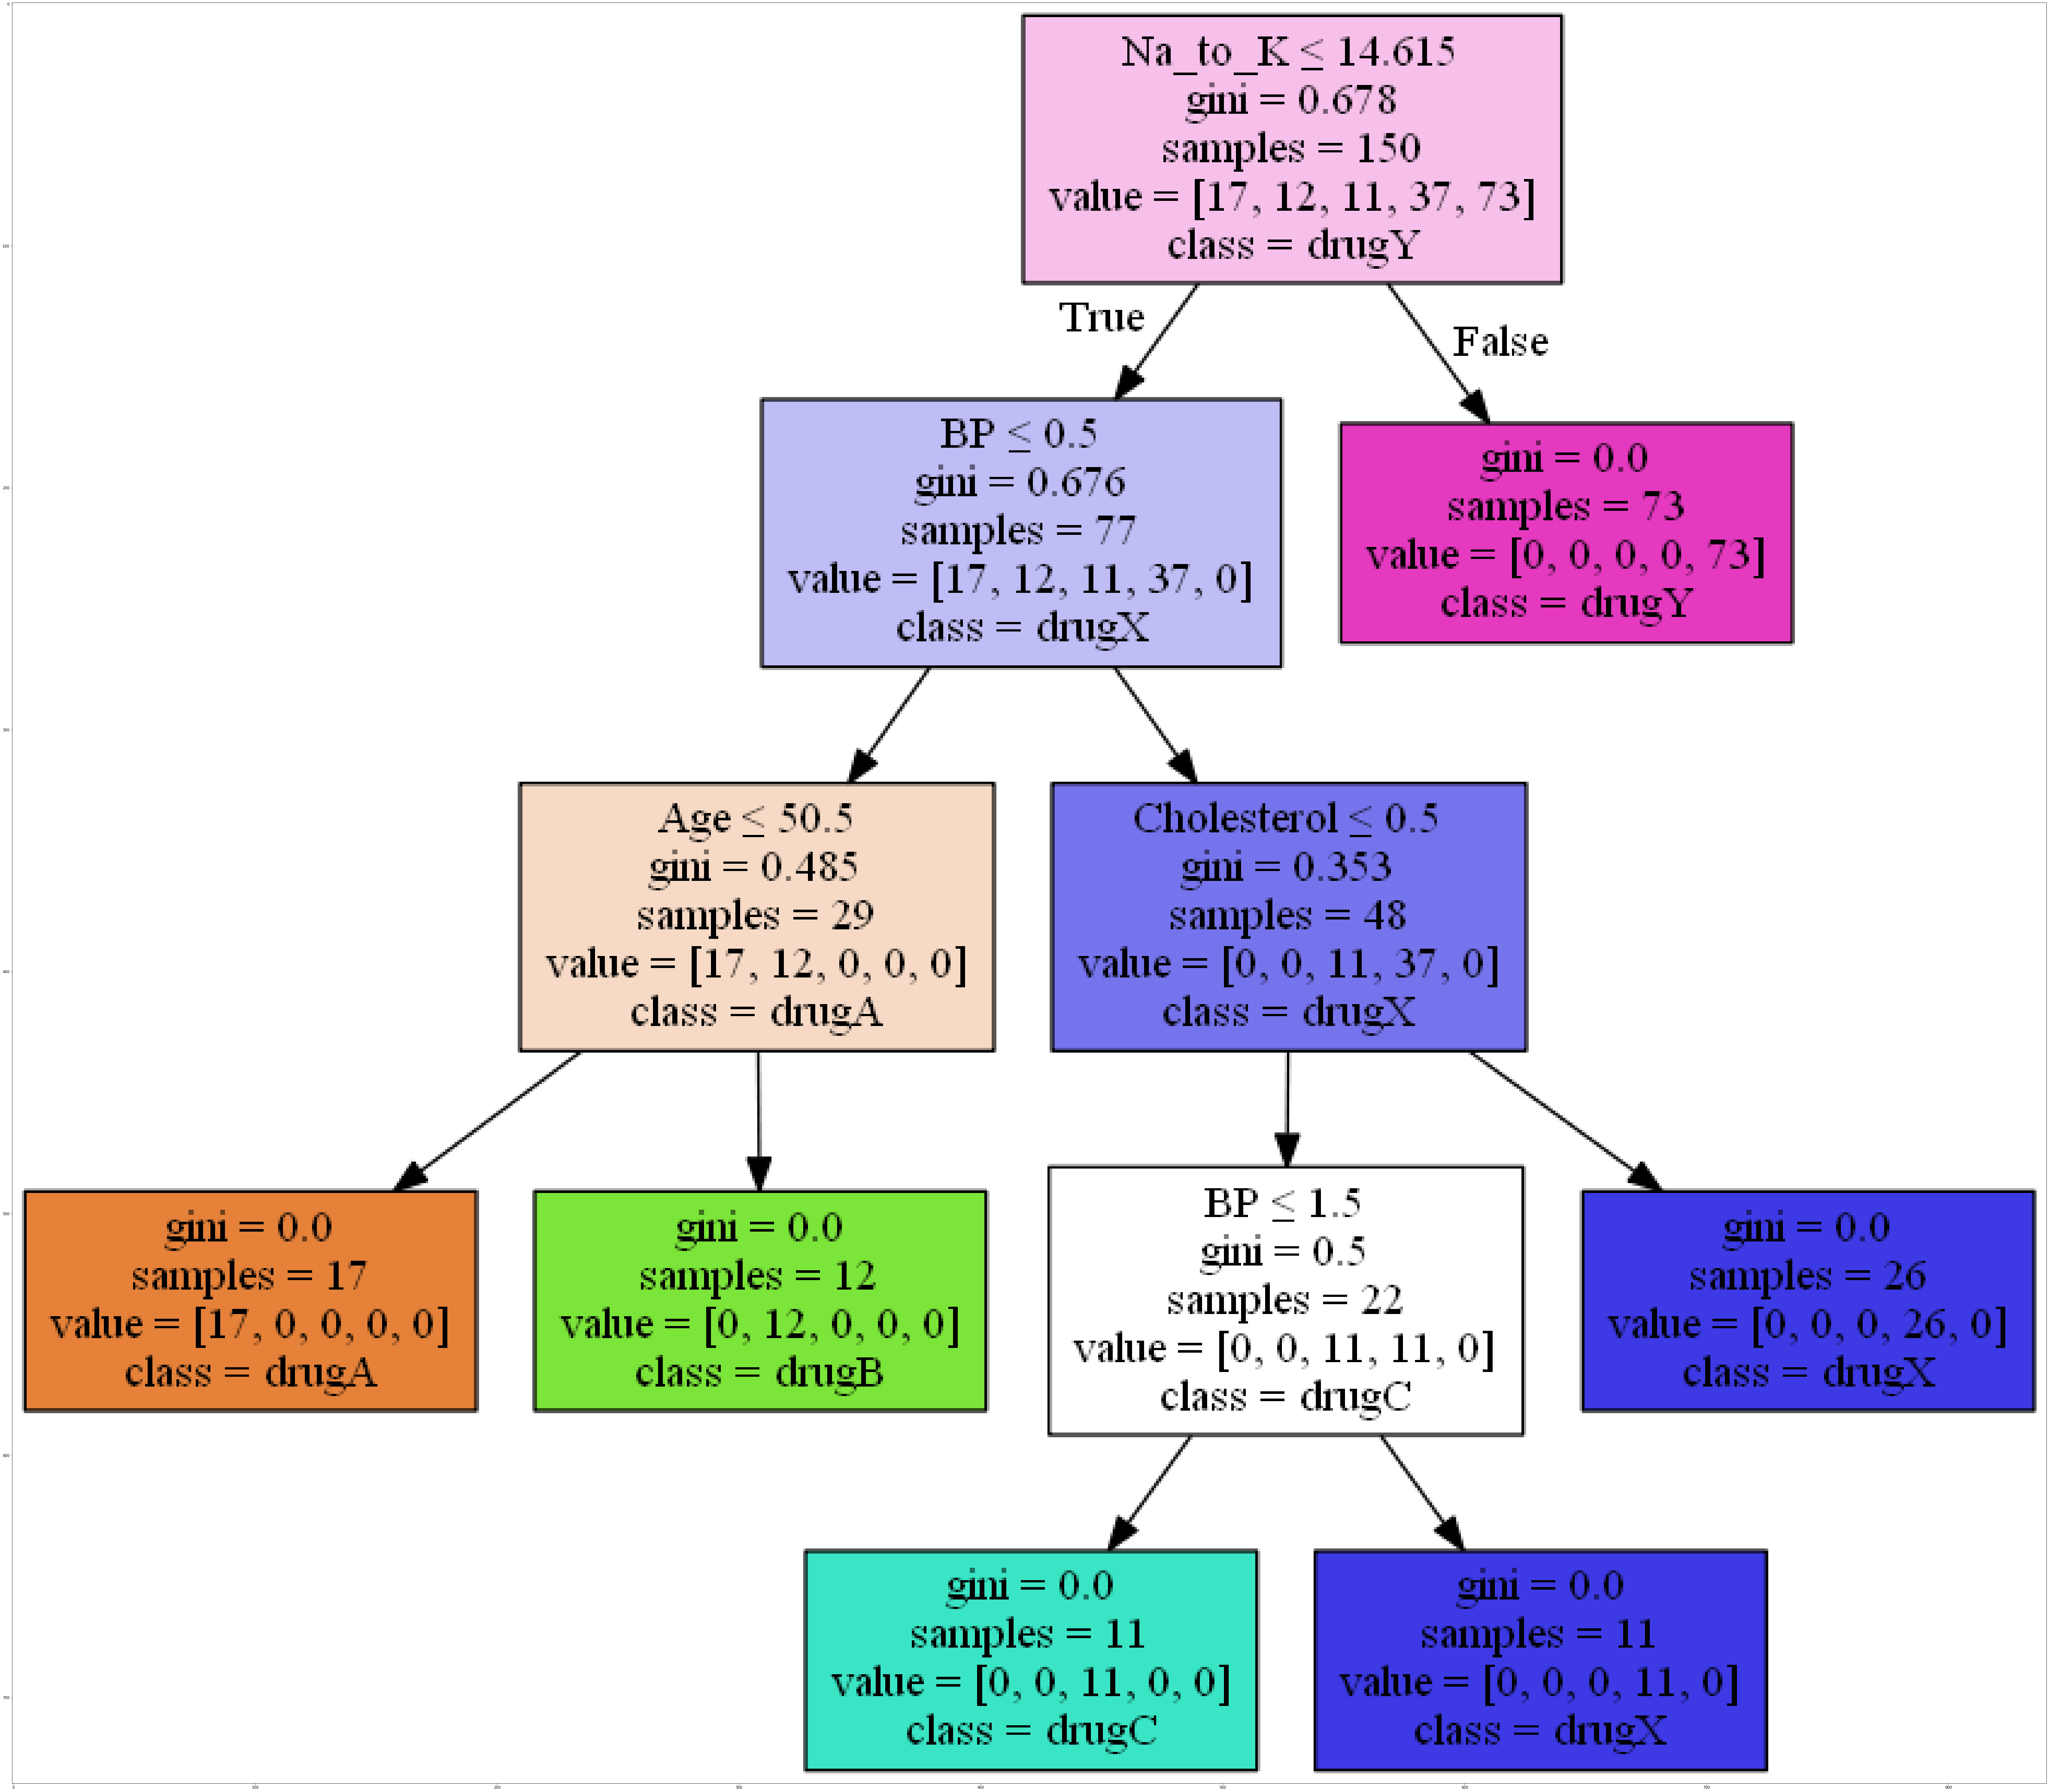

In [23]:
dot_data = StringIO()


filename = "drugtree.png"


featureNames = features.columns[0:5]


targetNames = target.unique().tolist()


out=tree.export_graphviz(tree1,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png(filename)

img = mpimg.imread(filename)

plt.figure(figsize=(100, 200))

plt.imshow(img,interpolation='nearest')

### Same Study, with different settings

In [34]:
## The previous example was using gini criterion and the best max_depth. 
tree2= DecisionTreeClassifier(max_depth=3,criterion="entropy")

tree2


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
##fitting the tree to the data.
tree2.fit(X_train,y_train)

## Predicting.

predictedY=tree2.predict(X_test)

## Checking the scores.
print("The accuracy is :",round(tree2.score(X_test,y_test),3))

print("True value: ",y_test.ravel()[:10])
print("Predicted value: ",predictedY[:10])

The accuracy is : 0.8
True value:  ['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA']
Predicted value:  ['drugY' 'drugX' 'drugC' 'drugC' 'drugC' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA']


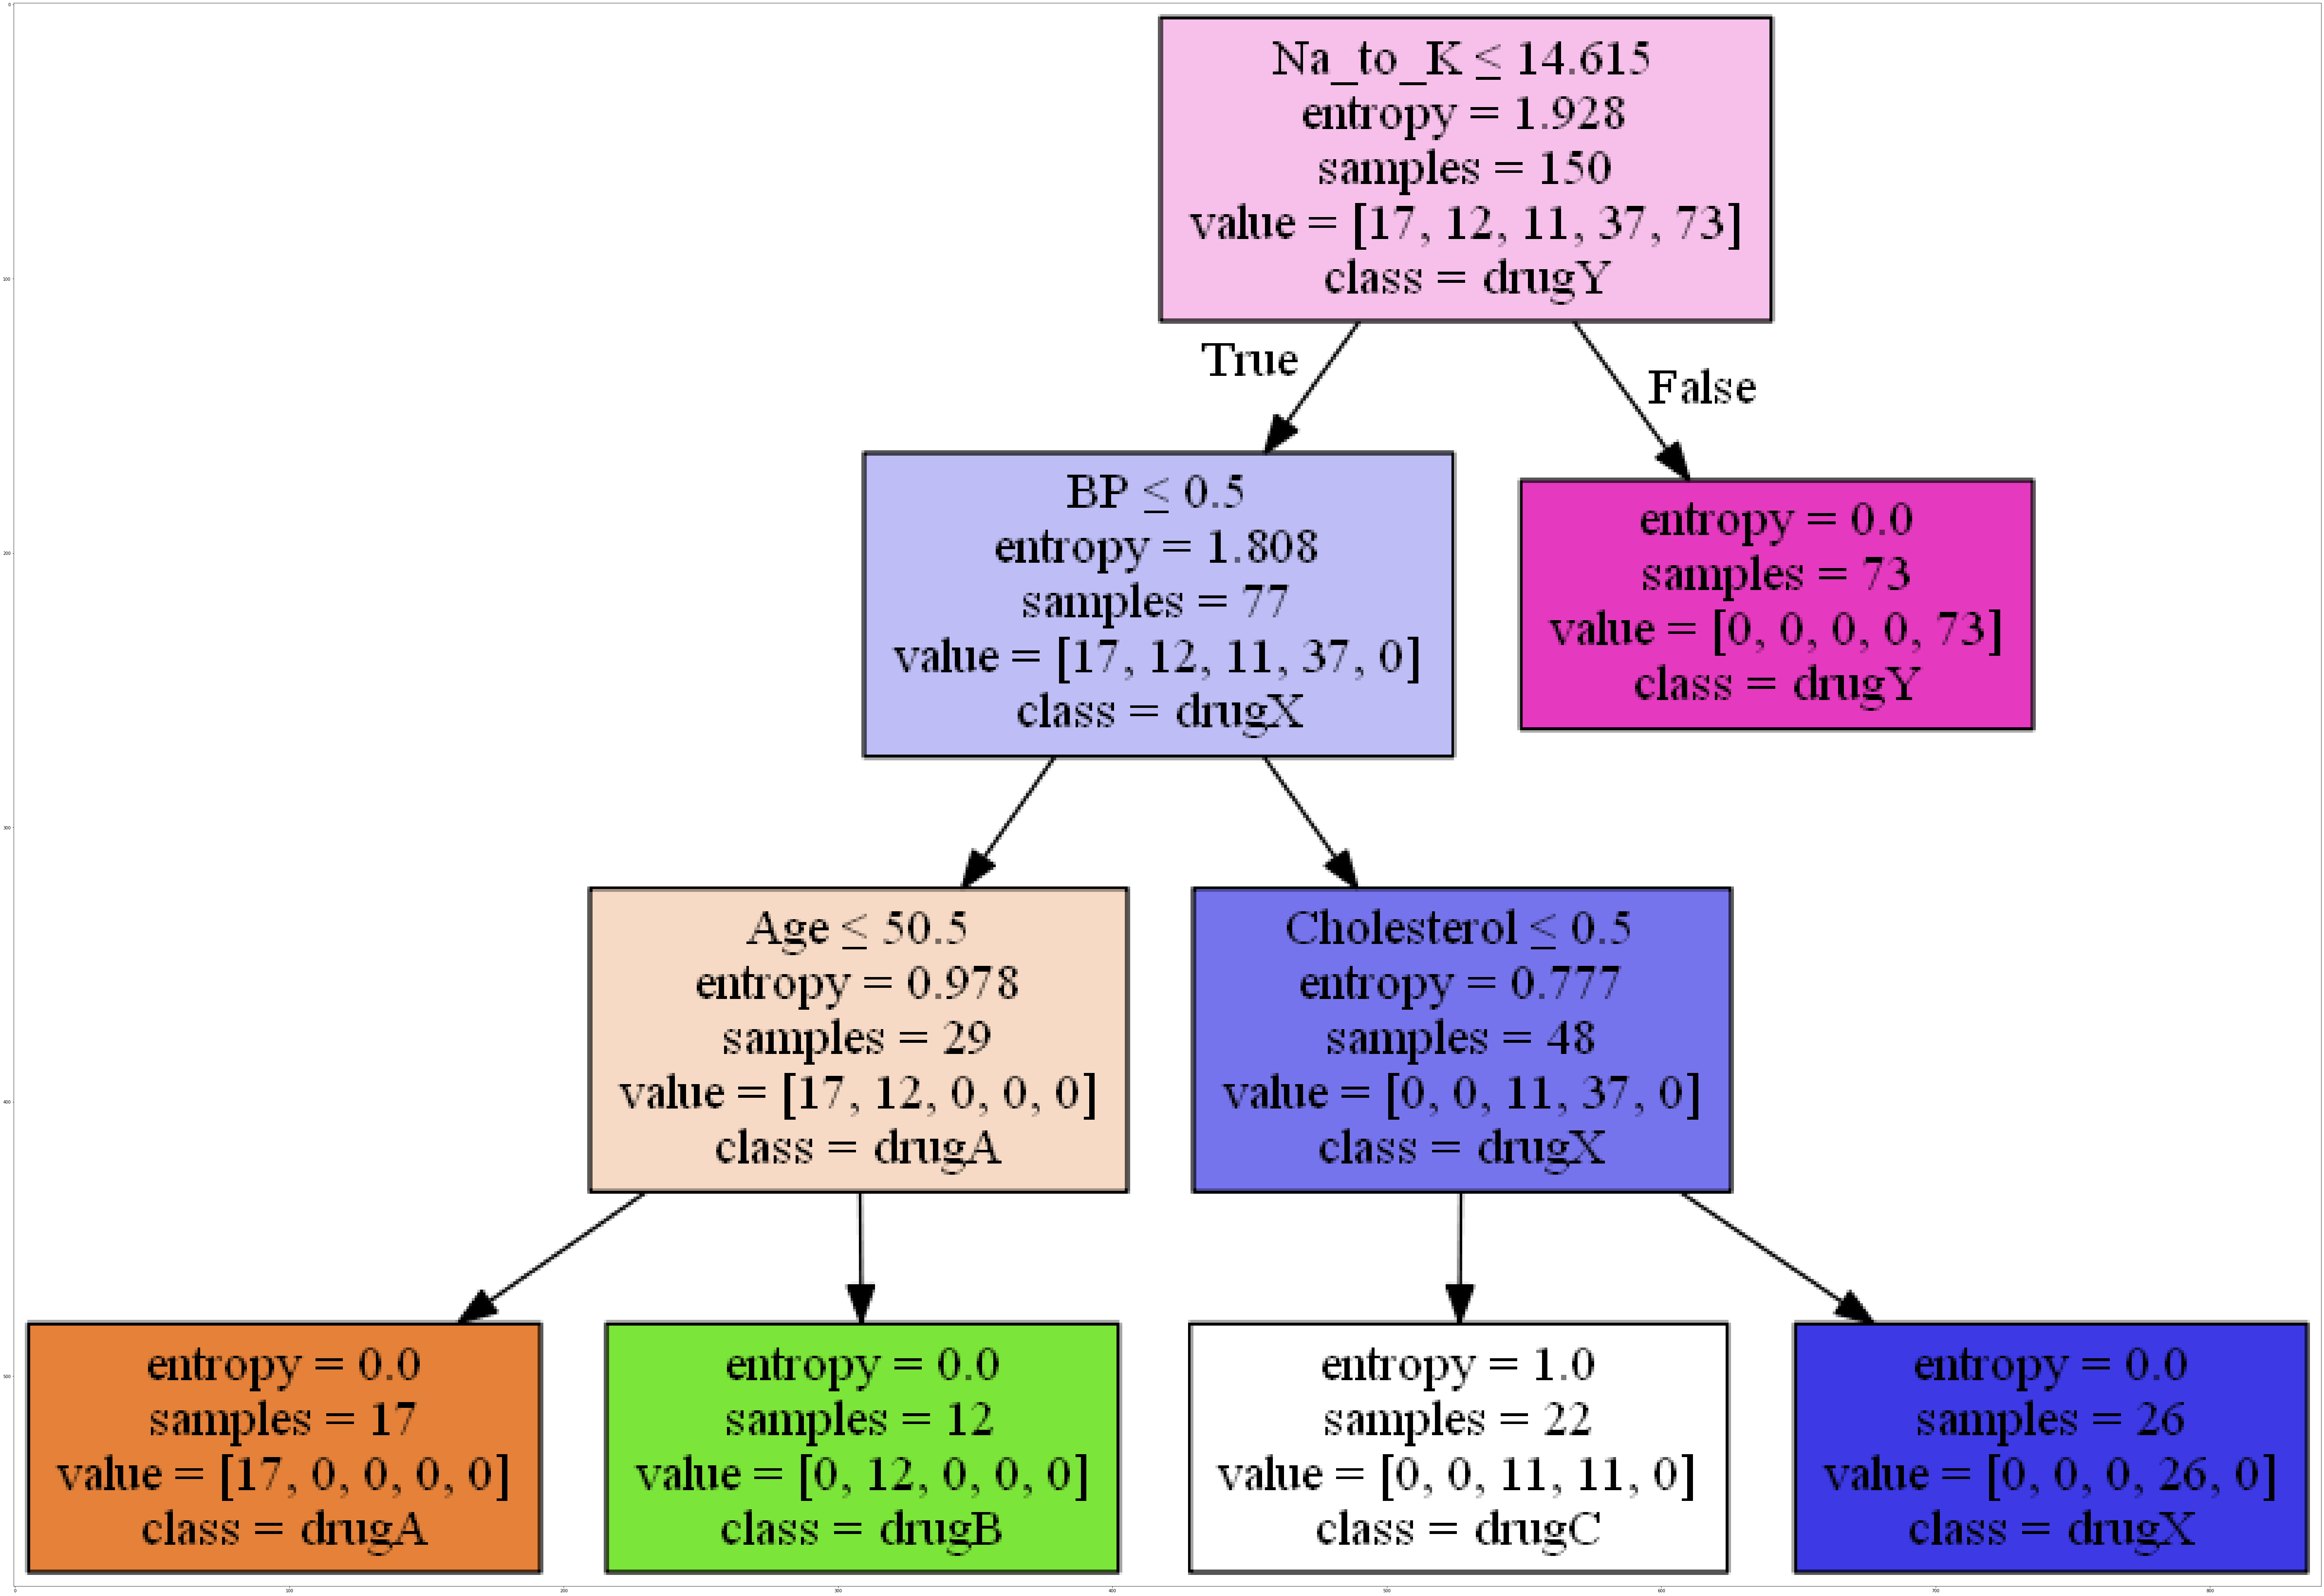

In [36]:
dot_data = StringIO()


filename = "drugtree.png"


featureNames = features.columns[0:5]


targetNames = target.unique().tolist()


out=tree.export_graphviz(tree2,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png(filename)

img = mpimg.imread(filename)

plt.figure(figsize=(100, 200))

plt.imshow(img,interpolation='nearest')

### Analysis

Limiting the depth of the tree yielded some mistakes in the White case. Values aren't pure and therefore our accuracy was affected.
Not a big deal, since we are just visualizing the differences in tree structure. Just visualizing the difference